In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [19]:
titanic = pd.read_csv("train.csv")
display(titanic.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Label Encoding

Sex değişkenini Mean encoding yaparak encode ediniz. Her kategori için Survived değişkeninin ortalamasını kategori adı ile değiştirebilirsiniz. 

IPUCU: pandas groupby ve map fonksiyonlarını kullanabilirsiniz.

In [20]:
df_mean = titanic.copy()
mean_encod = df_mean.groupby('Sex')['Survived'].mean()
print(mean_encod)
df_mean['Sex'] = df_mean['Sex'].map(mean_encod)
df_mean.head()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.188908,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.742038,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0.742038,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.742038,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0.188908,35.0,0,0,373450,8.0500,NaN,S


Bindikleri Yer (Embarked) değişkenini sklearn OneHotEncoder objesini kullanarak encode edin.<br>

In [21]:
df_embarked = titanic.copy()
df_embarked['Embarked'].fillna(df_embarked['Embarked'].mode()[0], inplace=True)
pd.get_dummies(df_embarked, columns=["Embarked"])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,1,0,0


In [22]:
enc = OneHotEncoder(sparse=False) 
encoded_features = enc.fit_transform(df_embarked[["Embarked"]]).astype(np.uint8)
categories = enc.categories_[0].tolist()
pd.DataFrame(encoded_features,columns=categories)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


Cabin değişkenini sklearn LabelEncoder veya OrdinalEncoder objesini kullanarak encode edin.

In [23]:
df_label = titanic.copy()
df_label['Cabin'].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F2             3
F33            3
              ..
C110           1
D56            1
C104           1
D19            1
B102           1
Name: Cabin, Length: 147, dtype: int64

# Outlier Handling

Fare değişkeni için boxplot çizdiriniz.

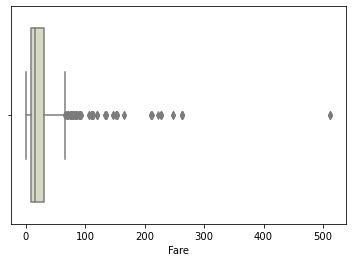

In [25]:
sns.boxplot("Fare",data = titanic, palette="ch:0.5")

In [38]:
df = titanic.copy()

data=pd.DataFrame(df["Fare"].describe())
data

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


Fare değişkeninedeki outlier değerleri Z-Score kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız. 

In [ ]:
from scipy.stats import zscore
z_score_df =zscore(df["Fare"])

for col in df.Fare:
    max_deger = df["Fare"][z_score<=3][col].max()
    min_deger = df["Fare"][z_score>=-3][col].min()
    new_df = df.copy()
    new_df["Fare"][col][z_score>3] = max_deger
    new_df["Fare"][col][z_score<-3] = min_deger
    

In [58]:
#kütüphanesiz kendim hesaplatmak istedim 

threshold1 = 3
threshold2 = -3
outlier = [] 
mean = df['Fare'].mean()
std = df['Fare'].std()

for i in df['Fare']: 
    z = (i-mean)/std 
    if z >= threshold1: 
        outlier.append(i) 
    elif z <= threshold2:
        outlier.append(i) 
print('Datasetteki outlier değerler ->\n',outlier) 
print('Outlier sayısı->', len(outlier))

Datasetteki outlier değerler ->
 [263.0, 263.0, 247.5208, 512.3292, 247.5208, 262.375, 263.0, 211.5, 227.525, 263.0, 221.7792, 227.525, 512.3292, 211.3375, 227.525, 227.525, 211.3375, 512.3292, 262.375, 211.3375]
Outlier sayısı-> 20


Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

Fare değişkeninedeki outlier değerleri IQR metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [118]:

q1 = df['Fare'].quantile(0.25)
q3 = df['Fare'].quantile(0.75)
IQR = q3 - q1

upper_limit = q3 + 1.5*IQR
lower_limit = q1 - 1.5*IQR
lower_limit, upper_limit




(-26.724, 65.6344)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [124]:
outlier_low = df.loc[(df["Fare"]<lower_limit),"Fare"]
outlier_up = df.loc[(df["Fare"]>upper_limit),"Fare"]

outlier_low, outlier_up


(Series([], Name: Fare, dtype: float64),
 1       71.2833
 27     263.0000
 31     146.5208
 34      82.1708
 52      76.7292
          ...   
 846     69.5500
 849     89.1042
 856    164.8667
 863     69.5500
 879     83.1583
 Name: Fare, Length: 116, dtype: float64)

Fare değişkeninedeki outlier değerleri Hard-Edges metodunu kullanarak tespit ediniz, sınır değerlerini ve kaç tane outlier değer olduğunu yazdırınız.

In [83]:
hard_df = titanic.copy()
lower_limit = hard_df["Fare"].quantile(q=0.10)
upper_limit =hard_df["Fare"].quantile(q=0.95)
lower_limit, upper_limit

(7.55, 112.07915)

Tespit ettiğiniz outlier'ları sınır değerler ile değiştiriniz.

In [94]:
hard_df_replaced = hard_df.copy()

In [92]:
lower_limit = hard_df_replaced["Fare"].min()
upper_limit = hard_df_replaced["Fare"].max()

lower_limit,upper_limit


(7.55, 112.07915)

In [132]:
outlierss = hard_df_replaced[(hard_df_replaced.Fare<lower_limit)|(hard_df_replaced.Fare>=upper_limit)]
len(outlierss)

116

Fare değişkeni için yukarıdaki 3 metodu kullanarak sınır değerler olarak bulduğunuz değerleri ve outlier sayılarını karşılaştırın. Bu değişken için hangisini kullanmak daha mantıklı olabilir?

In [134]:
print("Amacımız outlierları mümkün olduğunca azaltmak olduğu için Hard Edges yönteminde bunu başarabiliyoruz. Hard Edges ile quantile oranını kestirmek zor olabilir bu durumda Z Score kullanılması daha uygun olur.")

Amacımız outlierları mümkün olduğunca azaltmak olduğu için Hard Edges yöntemi ile q ayarlanarak başarabiliyoruz. Hard Edges ile quantile oranını kestirmek zor olabilir bu durumda Z Score kullanılması daha uygun olur.
